In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

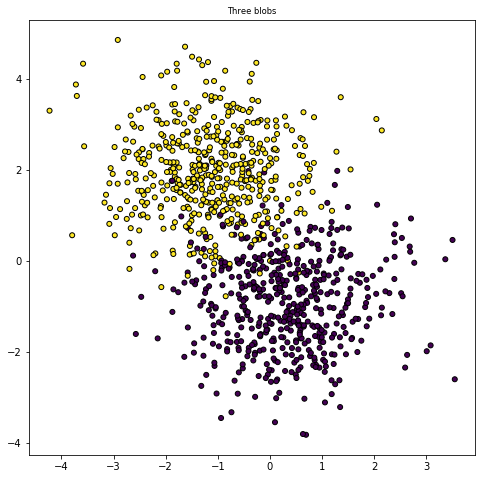

In [2]:
plt.figure(figsize=(8, 8))
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_samples =1000, n_features=4, centers=2, center_box=(-2,2))
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

In [3]:
classes=[]
classes.append(X1)
classes.append(Y1)
classes=tuple(classes)
#classes

In [4]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (700, 4)
Размер массива признаков тестовой выборки (300, 4)
Размер массива ответов для обучающей выборки (700,)
Размер массива ответов для тестовой выборки (300,)


In [5]:
k =1
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [6]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [7]:
y_pred = neigh.predict(X_test)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.960


In [8]:
# Для начала отмасштабируем выборку
X_ = X_shuffled.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

In [9]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X_.T.dot(X_)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i[0])

Собственные значения в порядке убывания:
2112.458256167197
960.0272442251044
563.3258894227555
364.1886101849422


In [10]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описвыаемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описвыаемая каждой из компонент 
[52.811456404179935, 24.000681105627613, 14.083147235568891, 9.104715254623558]
Кумулятивная доля дисперсии по компонентам 
[ 52.8114564   76.81213751  90.89528475 100.        ]


In [11]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.50670592 -0.31727219]
 [-0.59137249  0.06011595]
 [ 0.58368317 -0.03612409]
 [ 0.22987312  0.94573753]]


In [12]:
# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W)

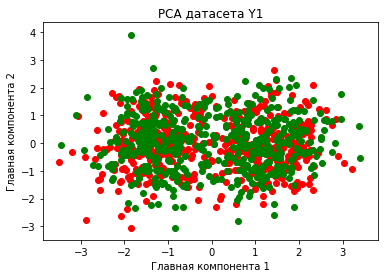

In [13]:
plt.figure()
y = Y1
for c, i in zip("rg", [0, 1]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета Y1')
plt.show()

In [14]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(Z.shape[0])
X_shuffled, y_shuffled = Z[shuffle_index], y[shuffle_index]


# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(Z) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (700, 2)
Размер массива признаков тестовой выборки (300, 2)
Размер массива ответов для обучающей выборки (700,)
Размер массива ответов для тестовой выборки (300,)


In [15]:
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.477
